# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color:rgba(0, 255, 21, 1); color:rgb(0, 0, 0); padding: 12px; line-height: 0.7;"> Menggunakan data sendiri</div></center>

In [2]:
#Coding 1
# Menggunakan data sendiri
import pandas as pd

# Memuat dataset dari file Excel yang diunggah
# Menggunakan header=1 untuk melewati 2 baris pertama yang tidak relevan
# Ini akan membaca baris ketiga sebagai header
df = pd.read_excel('Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi, 2024.xlsx', sheet_name='Sheet1', header=1)

# Menampilkan 5 baris pertama dari dataset
print("Lima baris pertama dataset:")
print(df.head())

# Menampilkan informasi dataset
print("\nInformasi dataset:")
print(df.info())

Lima baris pertama dataset:
       Unnamed: 0  \
0             NaN   
1             NaN   
2            ACEH   
3  SUMATERA UTARA   
4  SUMATERA BARAT   

  Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi  \
0  Margin Perdagangan dan Pengangkutan/MPP Total (%)                                  
1                                               2024                                  
2                                             121.42                                  
3                                              54.91                                  
4                                              21.46                                  

            Unnamed: 2  
0  Jumlah Rantai Utama  
1                 2024  
2                    4  
3                    3  
4                    2  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                       

Grafik MPP per provinsi berhasil dibuat dan disimpan sebagai 'grafik_mpp_per_provinsi.png'.


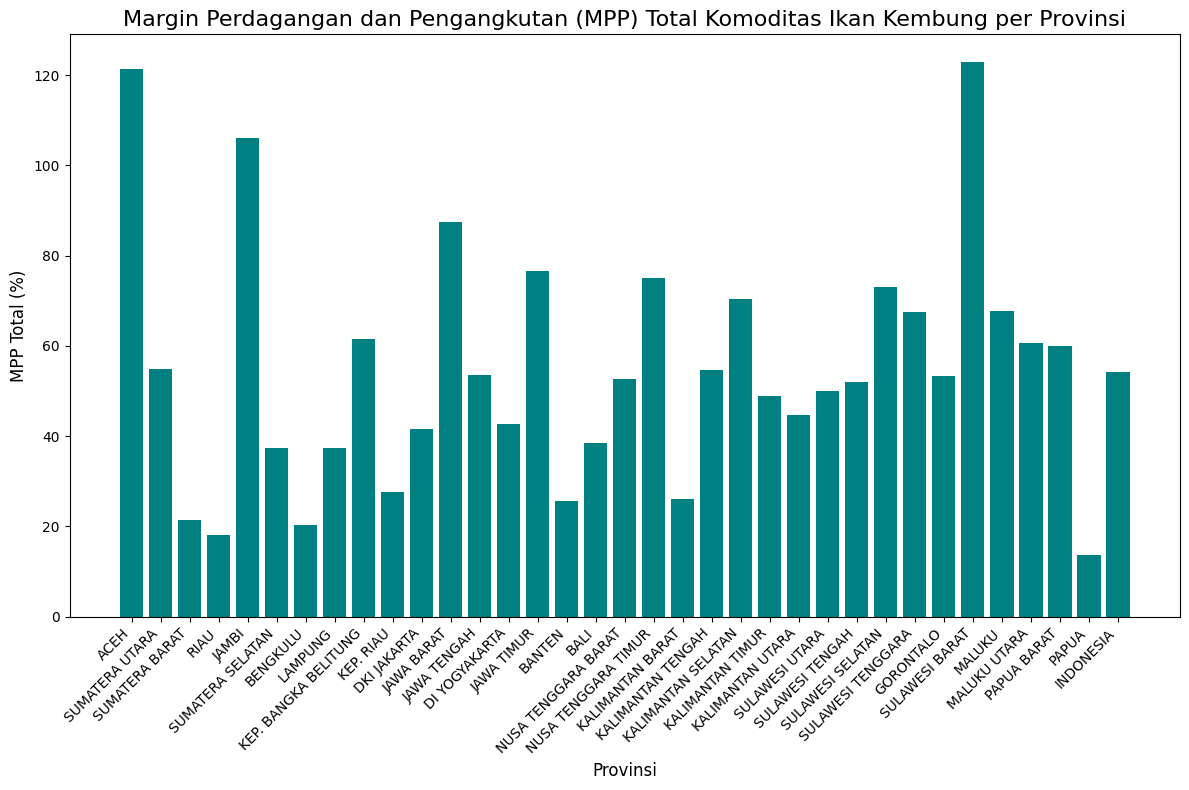

In [3]:
#Coding 2
#Membuat Grafik pada data tersebut
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset dari file Excel yang diunggah
# Menggunakan header=1 untuk membaca baris ketiga sebagai header
df = pd.read_excel('Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi, 2024.xlsx', sheet_name='Sheet1', header=1)

# Mengubah nama kolom agar lebih mudah digunakan
df.rename(columns={'Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi': 'MPP Total', 'Unnamed: 0': 'Provinsi'}, inplace=True)

# Drop the first two rows which are not part of the data
df = df.iloc[2:].copy()

# Convert 'MPP Total' to numeric, coercing errors to NaN
df['MPP Total'] = pd.to_numeric(df['MPP Total'], errors='coerce')

# Drop rows with NaN in 'MPP Total' (these correspond to '-' in the original data)
df.dropna(subset=['MPP Total'], inplace=True)

# Membuat grafik batang
plt.figure(figsize=(12, 8))
plt.bar(df['Provinsi'], df['MPP Total'], color='teal')

# Menambahkan judul dan label
plt.title('Margin Perdagangan dan Pengangkutan (MPP) Total Komoditas Ikan Kembung per Provinsi', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('MPP Total (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Untuk memastikan label tidak terpotong

# Menyimpan grafik
plt.savefig('grafik_mpp_per_provinsi.png')

print("Grafik MPP per provinsi berhasil dibuat dan disimpan sebagai 'grafik_mpp_per_provinsi.png'.")

Grafik perbandingan MPP antara Aceh dan Riau berhasil dibuat dan disimpan.


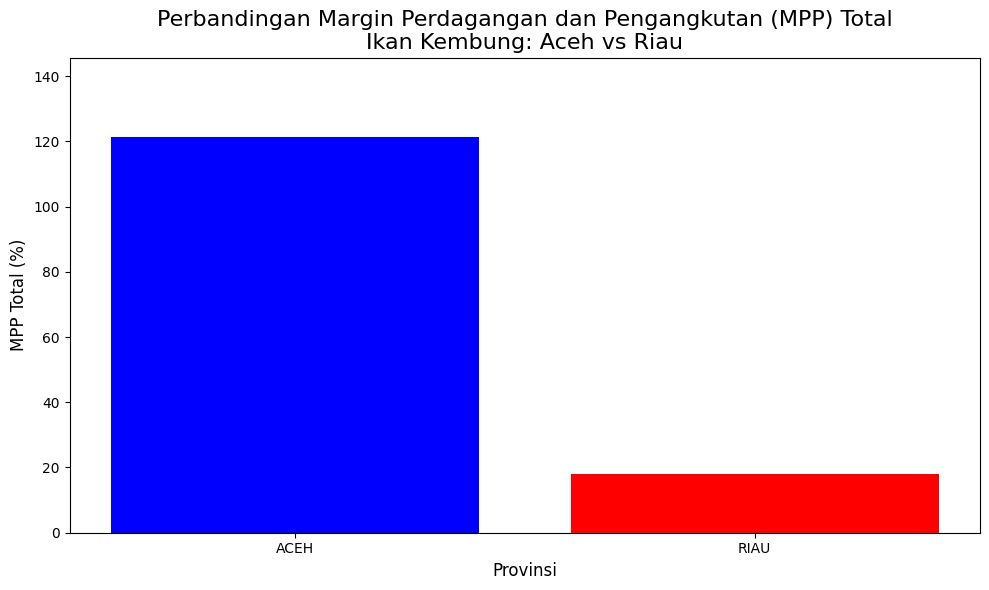

In [8]:
#Coding 3
#Membuat perbandingan antara provinsi satu dengan provinsi lainnya
import pandas as pd
import matplotlib.pyplot as plt

# Nama file Excel yang diunggah
file_name = 'Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi, 2024.xlsx'

# Memuat data dari file Excel
# Menggunakan header=1 untuk membaca baris ketiga sebagai header
df = pd.read_excel(file_name, sheet_name='Sheet1', header=1)


# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'Unnamed: 0': 'Provinsi', 'Margin Perdagangan dan Pengangkutan (MPP) Komoditas Ikan Kembung Menurut Provinsi': 'MPP Total'}, inplace=True)

# Drop the first two rows which are not part of the data
df = df.iloc[2:].copy()


# Mengonversi kolom 'MPP Total' ke format numerik, mengubah nilai non-numerik menjadi NaN
df['MPP Total'] = pd.to_numeric(df['MPP Total'], errors='coerce')

# Menghapus baris yang memiliki nilai NaN di kolom 'MPP Total'
df.dropna(subset=['MPP Total'], inplace=True)

# Memfilter data untuk provinsi Aceh dan Riau
provinces_to_compare = ['ACEH', 'RIAU']
df_filtered = df[df['Provinsi'].isin(provinces_to_compare)]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['Provinsi'], df_filtered['MPP Total'], color=['blue', 'red'])

# Menambahkan judul dan label
plt.title('Perbandingan Margin Perdagangan dan Pengangkutan (MPP) Total\nIkan Kembung: Aceh vs Riau', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('MPP Total (%)', fontsize=12)
plt.ylim(0, max(df_filtered['MPP Total']) * 1.2)
plt.tight_layout()

# Menyimpan grafik ke file
plt.savefig('perbandingan_mpp_aceh_riau.png')

print("Grafik perbandingan MPP antara Aceh dan Riau berhasil dibuat dan disimpan.")